# Colour Threshold, HSV Colour Space
Colour threshold practice by Mikaela Sanchez.<br>
Converting RGB images into HSV images to improve masking in varying lighting conditions.
### Import resources

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Read and display balloon image

Shape of image:  (635, 800, 3)


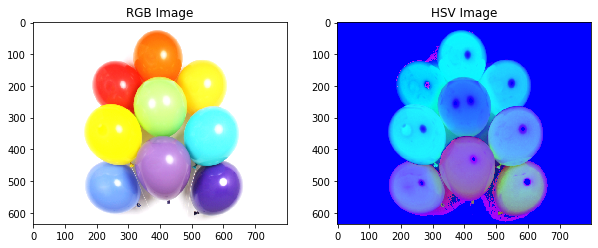

In [79]:
balloons = cv2.imread('images/balloons.png')
balloons_rgb = cv2.cvtColor(balloons, cv2.COLOR_BGR2RGB).copy()
balloons_hsv = cv2.cvtColor(balloons_rgb, cv2.COLOR_RGB2HSV).copy()

print('Shape of image: ', balloons_rgb.shape)

_, (rgb, hsv) = plt.subplots(1, 2, figsize=(10, 20))

rgb.set_title('RGB Image')
rgb.imshow(balloons_rgb)

hsv.set_title('HSV Image')
hsv.imshow(balloons_hsv)

### Plot each colour channel

(-0.5, 799.5, 634.5, -0.5)

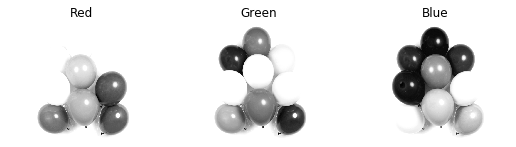

In [216]:
# RGB
r = balloons_rgb[:, :, 0]
g = balloons_rgb[:, :, 1]
b = balloons_rgb[:, :, 2]

_, (plt_r, plt_g, plt_b) = plt.subplots(1, 3, figsize=(9,3))

plt_r.set_title('Red')
plt_r.imshow(r, cmap='gray')
plt_r.axis('off')

plt_g.set_title('Green')
plt_g.imshow(g, cmap='gray')
plt_g.axis('off')

plt_b.set_title('Blue')
plt_b.imshow(b, cmap='gray')
plt_b.axis('off')

(-0.5, 799.5, 634.5, -0.5)

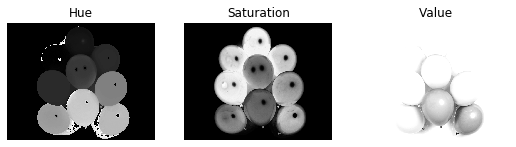

In [217]:
# HSV
h = balloons_hsv[:, :, 0]
s = balloons_hsv[:, :, 1]
v = balloons_hsv[:, :, 2]

_, (plt_h, plt_s, plt_v) = plt.subplots(1, 3, figsize=(9,3))

plt_h.set_title('Hue')
plt_h.imshow(h, cmap='gray')
plt_h.axis('off')

plt_s.set_title('Saturation')
plt_s.imshow(s, cmap='gray')
plt_s.axis('off')

plt_v.set_title('Value')
plt_v.imshow(v, cmap='gray')
plt_v.axis('off')

### Find blue hues

Hue value:  90
(5, 5, 3)


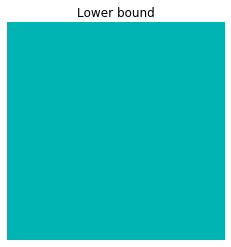

In [218]:
light_hue = balloons_hsv[350, 550, 0]
print('Hue value: ', light_hue)

light_blue_hsv = np.zeros((5, 5, 3), dtype=np.uint8)
light_blue_hsv[:, :, 0] = light_hue
light_blue_hsv[:, :, 1] = 255
light_blue_hsv[:, :, 2] = 180
print(light_blue_hsv.shape)

light_blue_rgb = cv2.cvtColor(light_blue_hsv, cv2.COLOR_HSV2RGB)

plt.axis('off')
plt.title('Lower bound')
plt.imshow(light_blue_rgb)

Hue value:  130
(5, 5, 3)


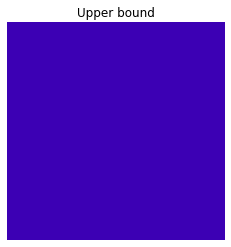

In [220]:
dark_hue = balloons_hsv[550, 600, 0]
print('Hue value: ', dark_hue)

dark_blue_hsv = np.zeros((5, 5, 3), dtype=np.uint8)
dark_blue_hsv[:, :, 0] = dark_hue
dark_blue_hsv[:, :, 1] = 255
dark_blue_hsv[:, :, 2] = 180
print(dark_blue_hsv.shape)

dark_blue_rgb = cv2.cvtColor(dark_blue_hsv, cv2.COLOR_HSV2RGB)

plt.axis('off')
plt.title('Upper bound')
plt.imshow(dark_blue_rgb)

### Create a mask

In [219]:
lower_rgb = np.array([0, 0, 100])
print('Lower bound RGB: ', lower_rgb)

upper_rgb = np.array([200, 255, 255])
print('Upper bound RGB: ', upper_rgb)

lower_hsv = np.array([80, 50, 0])
print('Lower bound HSV: ', lower_hsv)

upper_hsv = np.array([150, 255, 255])
print('Upper bound HSV: ', upper_hsv)

Lower bound RGB:  [  0   0 100]
Upper bound RGB:  [200 255 255]
Lower bound HSV:  [80 50  0]
Upper bound HSV:  [150 255 255]


(-0.5, 799.5, 634.5, -0.5)

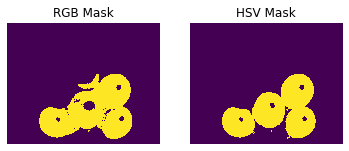

In [222]:
mask_rgb = cv2.inRange(balloons_rgb, lower_rgb, upper_rgb)
mask_hsv = cv2.inRange(balloons_hsv, lower_hsv, upper_hsv)

_, (mask_rgb_plt, mask_hsv_plt) = plt.subplots(1, 2)

mask_rgb_plt.set_title('RGB Mask')
mask_rgb_plt.imshow(mask_rgb)
mask_rgb_plt.axis('off')

mask_hsv_plt.set_title('HSV Mask')
mask_hsv_plt.imshow(mask_hsv)
mask_hsv_plt.axis('off')

(-0.5, 799.5, 634.5, -0.5)

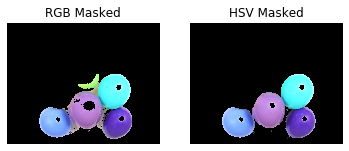

In [223]:
masked_img_rgb = np.copy(balloons_rgb)
masked_img_rgb[mask_rgb==0] = [0, 0, 0]

masked_img_hsv = np.copy(balloons_rgb)
masked_img_hsv[mask_hsv==0] = [0, 0, 0]

_, (cropped_img_rgb, cropped_img_hsv) = plt.subplots(1, 2)

cropped_img_rgb.set_title('RGB Masked')
cropped_img_rgb.imshow(masked_img_rgb)
cropped_img_rgb.axis('off')

cropped_img_hsv.set_title('HSV Masked')
cropped_img_hsv.imshow(masked_img_hsv)
cropped_img_hsv.axis('off')

### Adding a background (for fun!)

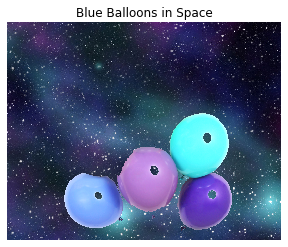

In [226]:
space = cv2.imread('images/space_background.jpg')

# Isolating the background
space_cropped = cv2.cvtColor(space, cv2.COLOR_BGR2RGB).copy()
space_cropped = space_cropped[0:balloons_rgb.shape[0], 0:balloons_rgb.shape[1]]
space_cropped[mask_hsv != 0] = [0, 0, 0]

blue_balloons_cropped = masked_img_hsv

# Combining the background and the balloons
blue_balloons_in_space = space_cropped + blue_balloons_cropped

plt.title('Blue Balloons in Space')
plt.axis('off')
plt.imshow(blue_balloons_in_space)